# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**

In [4]:
# Import libraries
# you can install missing library using pip install numpy 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Download the dataset

url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
housing_backup = housing_prices

In [6]:
housing_prices

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [7]:
housing_prices.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [8]:
housing_prices.describe()

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,8.757479
std,48239.423663,1.066000e+07,1.474217,1.255913,7.466471
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,4.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,6.700000
75%,119401.500000,1.550000e+07,5.000000,4.000000,10.000000
max,168445.000000,4.490000e+07,7.000000,6.000000,194.000000


In [9]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [21]:
housing_prices = housing_prices.drop('Unnamed: 0', axis=1)

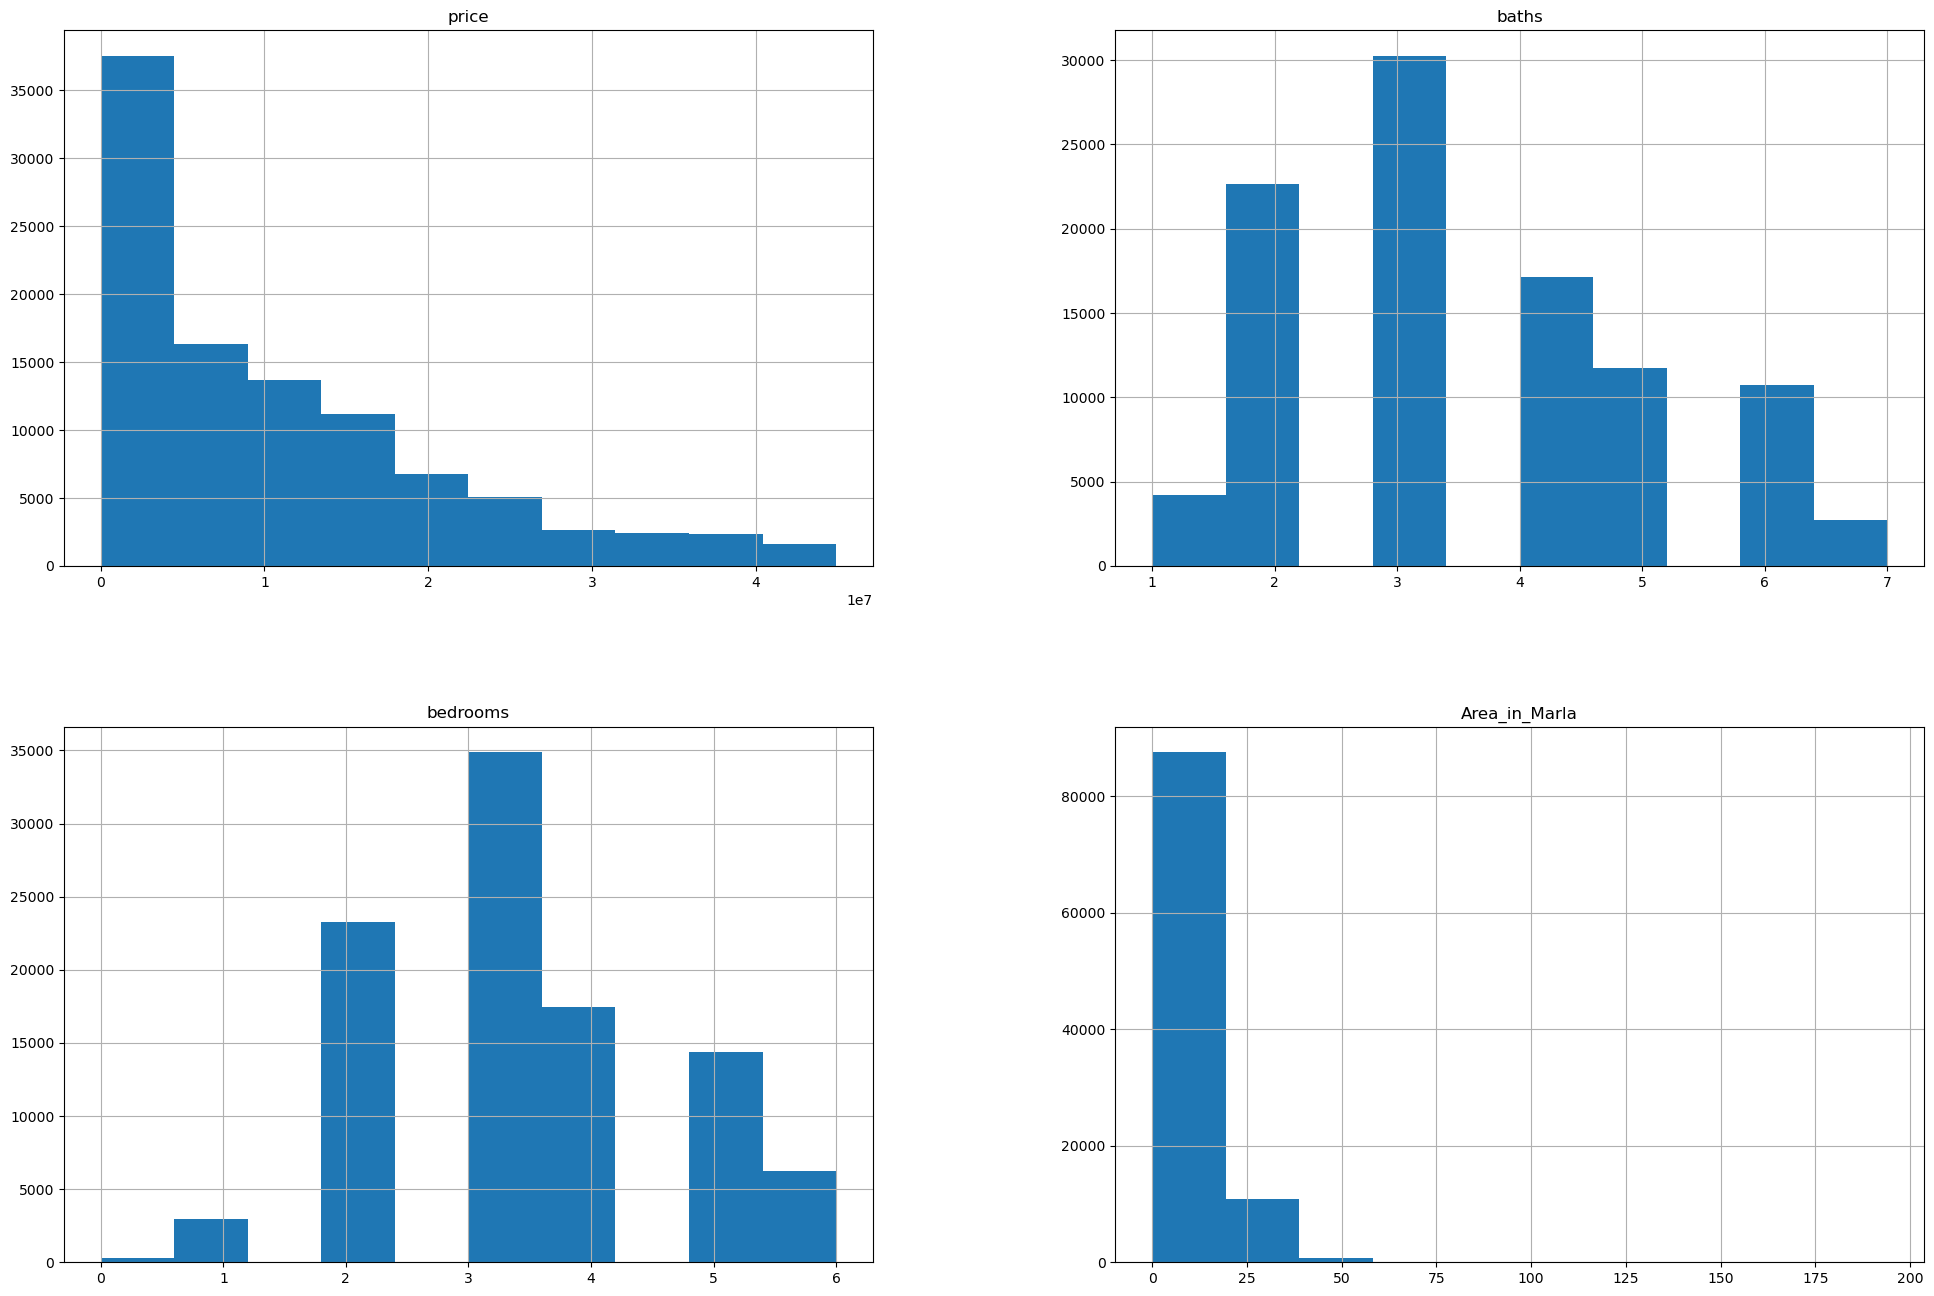

In [22]:
housing_prices.hist(figsize=(24, 16))
plt.show()

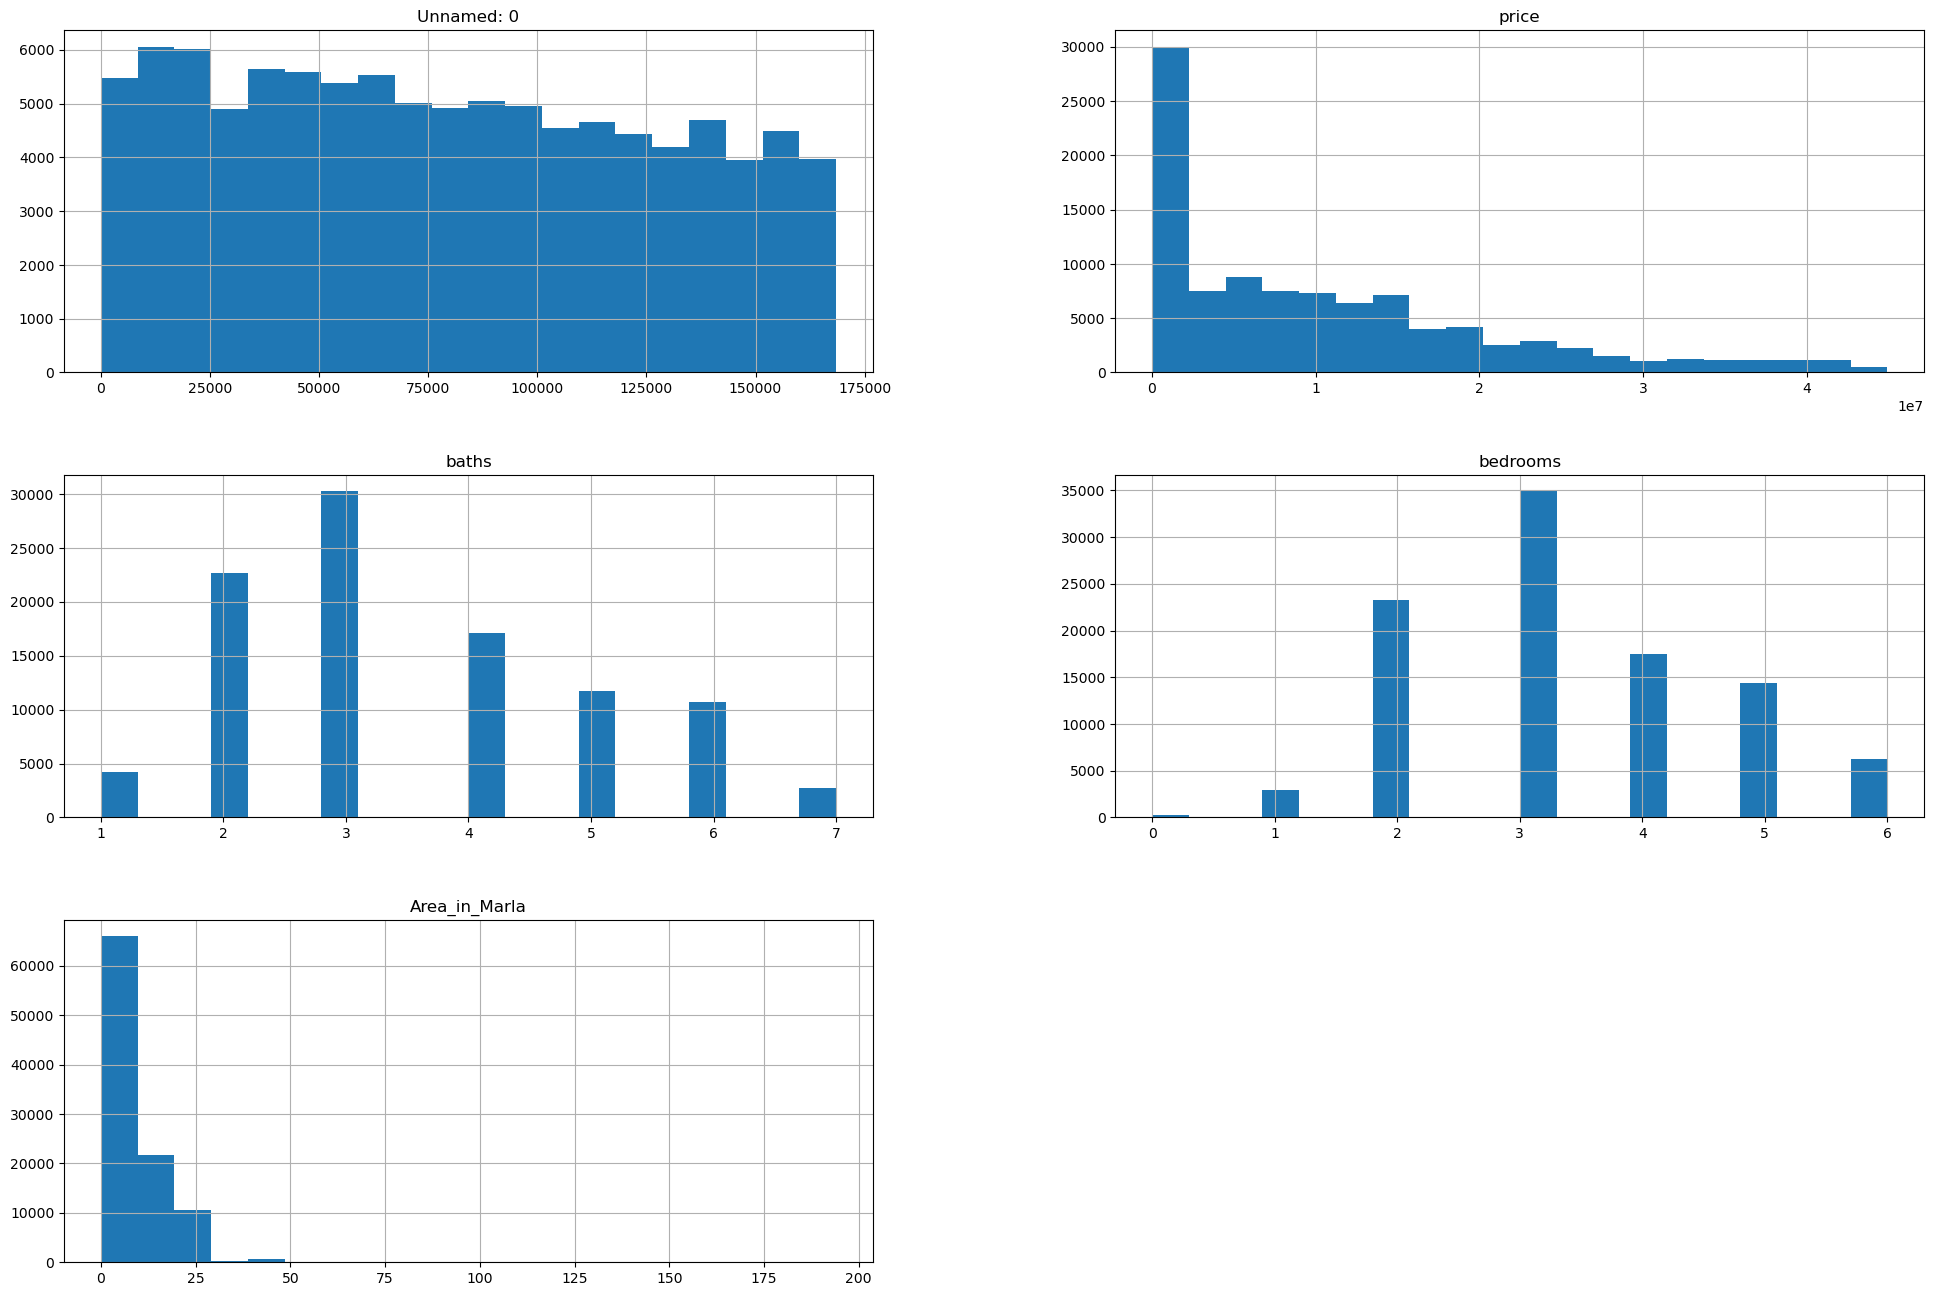

In [9]:
housing_prices.hist(bins=20, figsize=(24, 16))
plt.show()

c:\Users\musal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\musal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\musal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\musal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

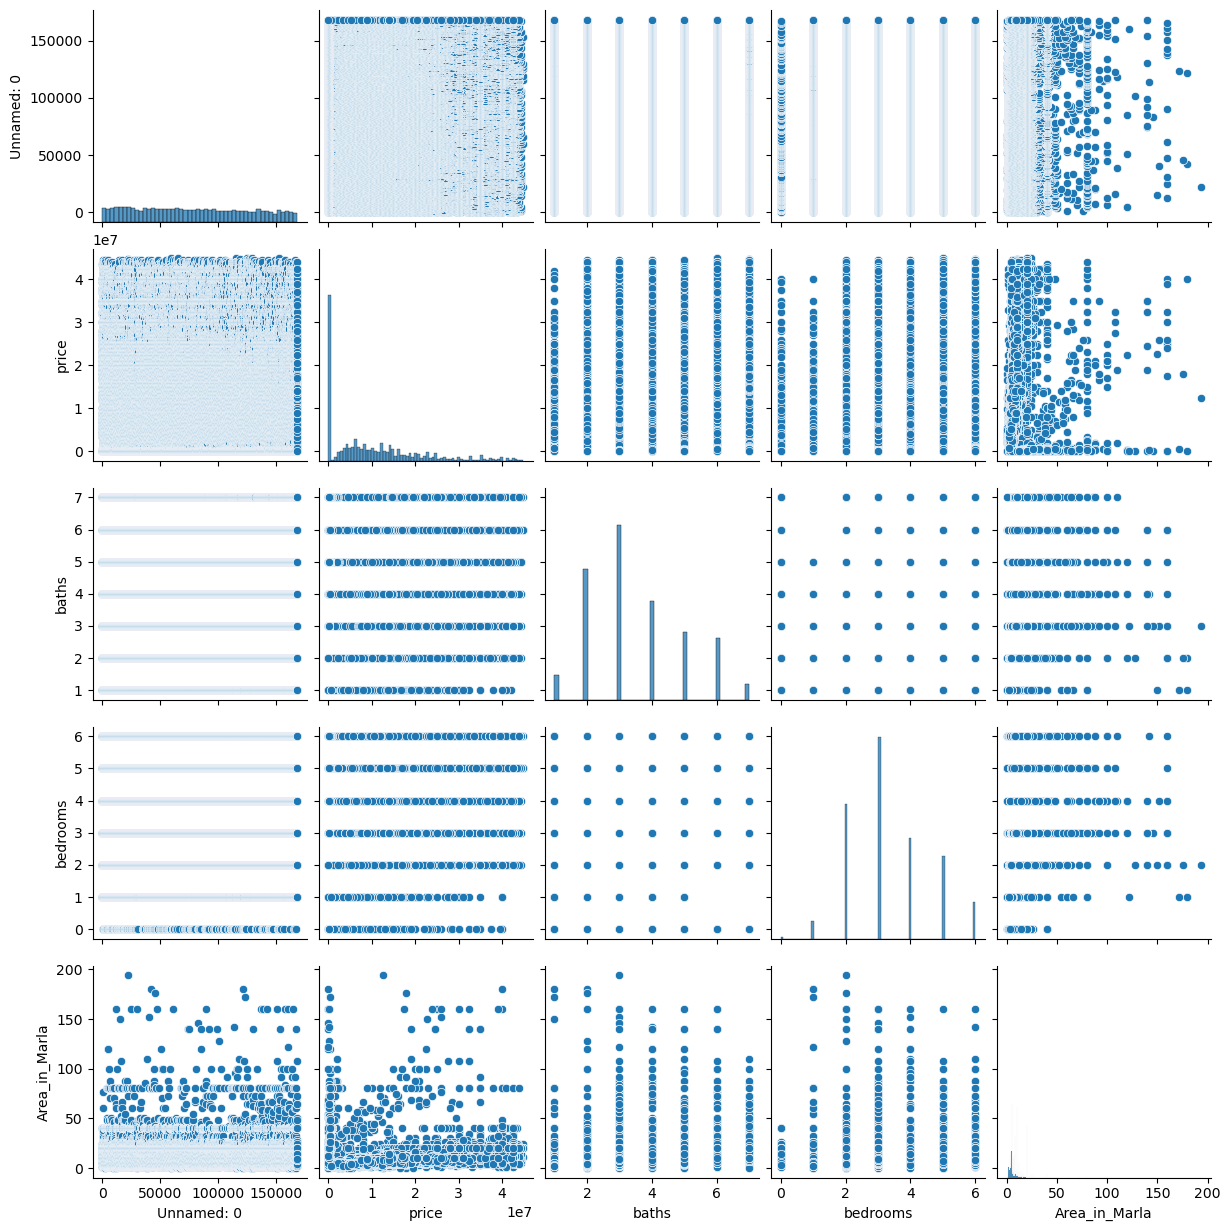

In [12]:
#Check for correlation between attributes using sns.pairplot.
sns.pairplot(housing_prices)

In [13]:
corr_matrix = housing_prices.corr(numeric_only=True)
corr_matrix

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
Unnamed: 0,1.000000,-0.007957,0.001672,-0.015748,0.061182
price,-0.007957,1.000000,0.496222,0.464393,0.145644
baths,0.001672,0.496222,1.000000,0.863885,0.373993
bedrooms,-0.015748,0.464393,0.863885,1.000000,0.352021
Area_in_Marla,0.061182,0.145644,0.373993,0.352021,1.000000


In [15]:
#corr_matrix["bedrooms"].sort_values(ascending=False)

bedrooms         1.000000
baths            0.863885
price            0.464393
Area_in_Marla    0.352021
Unnamed: 0      -0.015748
Name: bedrooms, dtype: float64